In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing filterwarnings to ignore warning messages**

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Import Required Library**

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro, bartlett
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson

**Importing Dataset**

In [6]:
data = pd.read_excel("/content/drive/MyDrive/MVA/Equamax.xlsx")

In [7]:
data

,0,1,2,3,4,Life_Expectancy
0,-1.321170,2.554592,0.151215,0.743292,-1.424271,65.0
1,0.913394,-0.858197,-0.089657,0.376767,-0.305957,77.8
2,0.714836,0.425719,0.023964,-0.286196,-0.868309,75.6
3,-1.385206,0.436653,0.140758,1.298880,1.185643,52.4
4,0.697782,-0.236763,0.442916,0.361209,-0.457063,76.4
...,...,...,...,...,...,...
2933,-0.705955,-0.783623,-0.281348,-0.650759,-0.660830,72.5
2934,0.939729,2.900209,0.029180,-0.004348,-0.945605,73.4
2935,-0.464618,2.206387,-0.299859,0.392579,-1.061399,68.0
2936,0.187417,0.497910,-0.796920,0.821276,1.798789,45.6


**Data Pre-Processing**

**Creating a copy of original dataset**



In [8]:
df = data.copy()

In [9]:
df.columns = ['Factor1', 'Factor2','Factor3', 'Factor4','Factor5','Life_Expectancy']

In [10]:
df.head(10)

,Factor1,Factor2,Factor3,Factor4,Factor5,Life_Expectancy
0,-1.321170,2.554592,0.151215,0.743292,-1.424271,65.0
1,0.913394,-0.858197,-0.089657,0.376767,-0.305957,77.8
2,0.714836,0.425719,0.023964,-0.286196,-0.868309,75.6
3,-1.385206,0.436653,0.140758,1.298880,1.185643,52.4
4,0.697782,-0.236763,0.442916,0.361209,-0.457063,76.4
5,0.354316,-0.678763,0.672916,-0.516062,-0.370359,76.3
6,0.559251,-0.639332,-0.614023,-0.850911,-0.536829,74.8
7,0.207995,-0.672271,1.255364,-0.680794,-0.488354,82.8
8,0.395898,-0.430093,1.028508,0.429250,-0.506497,81.5
9,0.735809,-0.426959,-0.577358,-0.705237,-0.606301,72.7


In [11]:
df.tail(10)

,Factor1,Factor2,Factor3,Factor4,Factor5,Life_Expectancy
2928,-0.328697,0.621309,-0.120148,2.544134,1.355415,49.2
2929,-0.624892,-1.264893,-0.609670,-0.133389,-0.235797,76.8
2930,-1.603592,-0.708131,0.836376,-1.126902,-0.602885,75.1
2931,0.989994,-0.608289,-1.702196,-0.032737,0.065568,67.1
2932,-1.018605,-1.296632,-1.443010,0.732863,-0.870109,69.0
2933,-0.705955,-0.783623,-0.281348,-0.650759,-0.660830,72.5
2934,0.939729,2.900209,0.029180,-0.004348,-0.945605,73.4
2935,-0.464618,2.206387,-0.299859,0.392579,-1.061399,68.0
2936,0.187417,0.497910,-0.796920,0.821276,1.798789,45.6
2937,-0.238343,1.515518,-0.521852,-0.238842,1.372909,46.0


**To Find Data type and missing values in data**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Factor1          2938 non-null   float64
 1   Factor2          2938 non-null   float64
 2   Factor3          2938 non-null   float64
 3   Factor4          2938 non-null   float64
 4   Factor5          2938 non-null   float64
 5   Life_Expectancy  2938 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB




1.   No missing values present in the data set.
2.   Independent variables are of float data type where as dependent variable(Life_Expectancy) are of float data type.




In [13]:
df.shape

(2938, 6)

In [14]:
df.size

17628

**Descriptive statistics**

In [15]:
df.describe()

,Factor1,Factor2,Factor3,Factor4,Factor5,Life_Expectancy
count,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000
mean,5.162461e-16,-6.665873e-17,-2.036039e-16,-2.418741e-16,-1.630191e-16,69.248795
std,9.541313e-01,9.666662e-01,9.106627e-01,1.001376e+00,8.286796e-01,9.462136
min,-2.941146e+00,-1.807863e+00,-1.995850e+00,-1.828125e+00,-2.020690e+00,45.600000
25%,-4.943799e-01,-6.985537e-01,-6.541442e-01,-8.266891e-01,-5.684316e-01,63.200000
50%,2.887136e-01,-2.936809e-01,-1.897981e-01,-2.329623e-01,-1.754075e-01,72.000000
75%,7.165305e-01,5.554050e-01,4.425118e-01,6.798988e-01,4.218994e-01,75.600000
max,1.539462e+00,3.027319e+00,2.684924e+00,2.987188e+00,2.379419e+00,89.000000




*   describe() function tell us five number summary that is min, max, quartile, mean, count.




**Finding Missing values in data set if any**

In [16]:
df.isnull().sum()

Factor1            0
Factor2            0
Factor3            0
Factor4            0
Factor5            0
Life_Expectancy    0
dtype: int64



*   Here we can see that, there are no missing values present in data



**Correlation**

In [17]:
df.corr()

,Factor1,Factor2,Factor3,Factor4,Factor5,Life_Expectancy
Factor1,1.000000,-0.004209,0.050414,-0.006911,-0.036187,0.444509
Factor2,-0.004209,1.000000,-0.047957,0.000593,0.013406,-0.372747
Factor3,0.050414,-0.047957,1.000000,-0.001003,-0.080446,0.554459
Factor4,-0.006911,0.000593,-0.001003,1.000000,0.003370,-0.146001
Factor5,-0.036187,0.013406,-0.080446,0.003370,1.000000,-0.519301
Life_Expectancy,0.444509,-0.372747,0.554459,-0.146001,-0.519301,1.000000




*   Independent variable is Highly Correlated with dependent variable with the value of correlation 0.98



**Data Visualization**

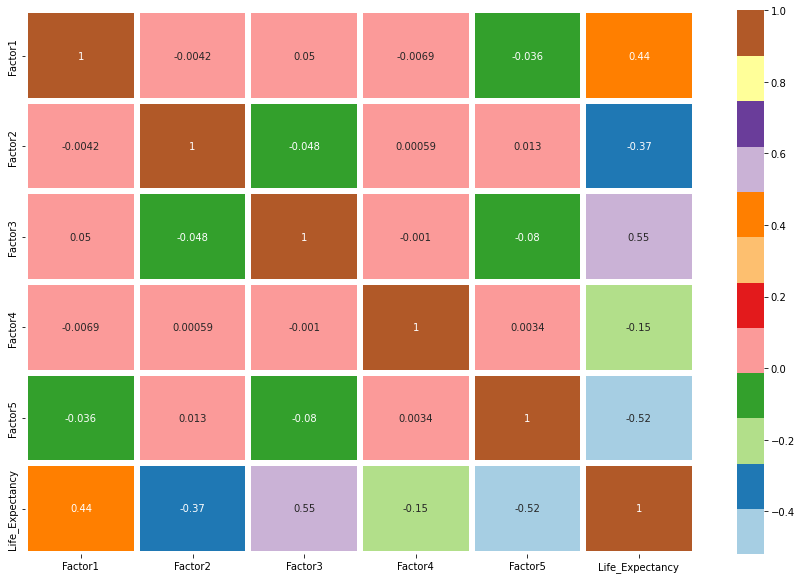

In [18]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 5 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

**Checking Assumption of Linear Regression**

**Linearity**


> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable



Text(0.5, 0.98, 'Scatter Plot')

<Figure size 1080x720 with 0 Axes>

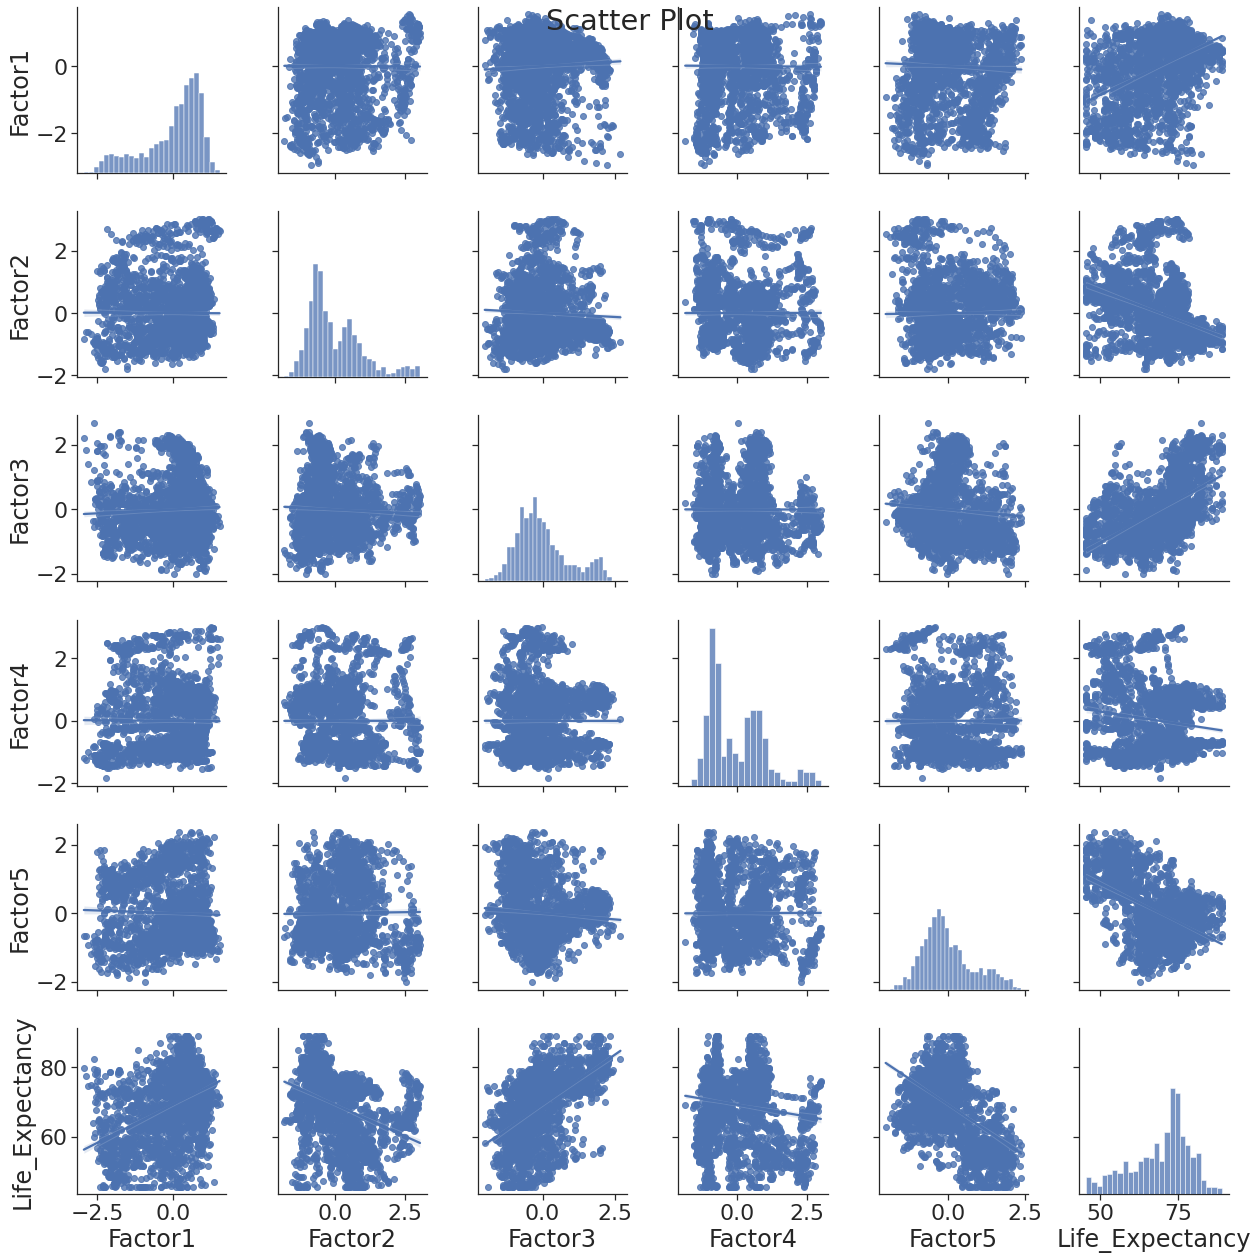

In [19]:
# Lineaerity ans Normality test
plt.figure(figsize = (15,10))
sns.set(style = "ticks", color_codes = True, font_scale = 2)
g = sns.pairplot(df, height = 3, diag_kind = "hist", kind = "reg")
g.fig.suptitle("Scatter Plot")

Text(733.4, 0.5, 'Life_Expectancy')

<Figure size 1080x720 with 0 Axes>

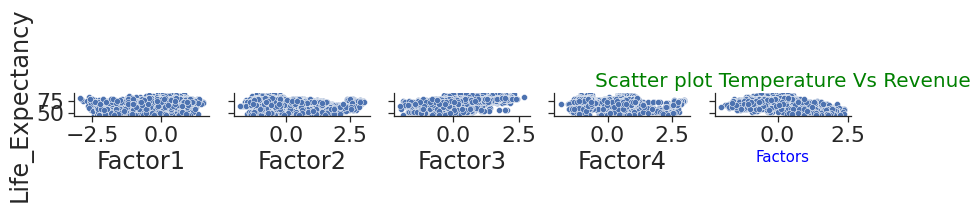

In [20]:
plt.figure(figsize=(15,10))
sns.pairplot(x_vars = ["Factor1","Factor2","Factor3","Factor4","Factor5"], y_vars = ["Life_Expectancy"], data= df)
plt.title("Scatter plot Temperature Vs Revenue", size = 20, color = "Green")
plt.xlabel("Factors", size = 15, color = "Blue")
plt.ylabel("Life_Expectancy", size = 15, color = "Blue")

**From Scatter Plot We can observe that there is a positive linear correlation between Temperature and Revenue.**

Text(0, 0.5, 'Life_Expectancy')

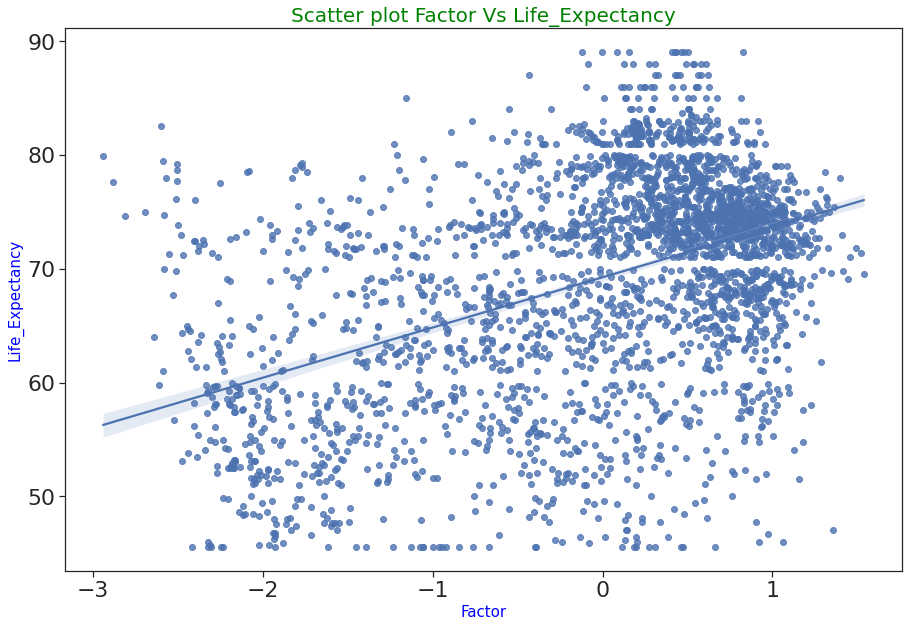

In [21]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Factor1", y = "Life_Expectancy", data= df ) 
plt.title("Scatter plot Factor Vs Life_Expectancy", size = 20, color = "Green")
plt.xlabel("Factor", size = 15, color = "Blue")
plt.ylabel("Life_Expectancy", size = 15, color = "Blue")

Text(0, 0.5, 'Life_Expectancy')

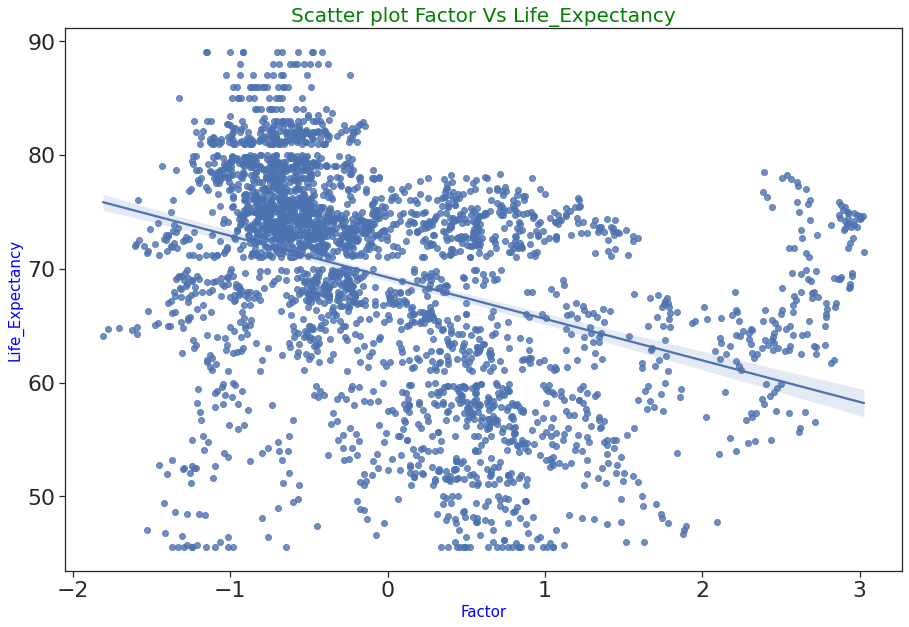

In [22]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Factor2", y = "Life_Expectancy", data= df ) 
plt.title("Scatter plot Factor Vs Life_Expectancy", size = 20, color = "Green")
plt.xlabel("Factor", size = 15, color = "Blue")
plt.ylabel("Life_Expectancy", size = 15, color = "Blue")

Text(0, 0.5, 'Life_Expectancy')

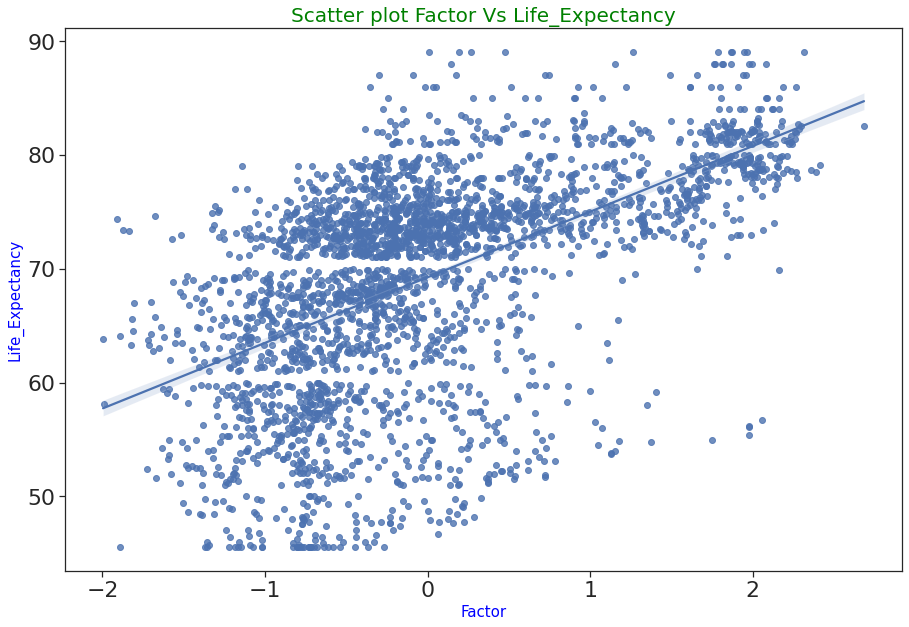

In [23]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Factor3", y = "Life_Expectancy", data= df ) 
plt.title("Scatter plot Factor Vs Life_Expectancy", size = 20, color = "Green")
plt.xlabel("Factor", size = 15, color = "Blue")
plt.ylabel("Life_Expectancy", size = 15, color = "Blue")

Text(0, 0.5, 'Life_Expectancy')

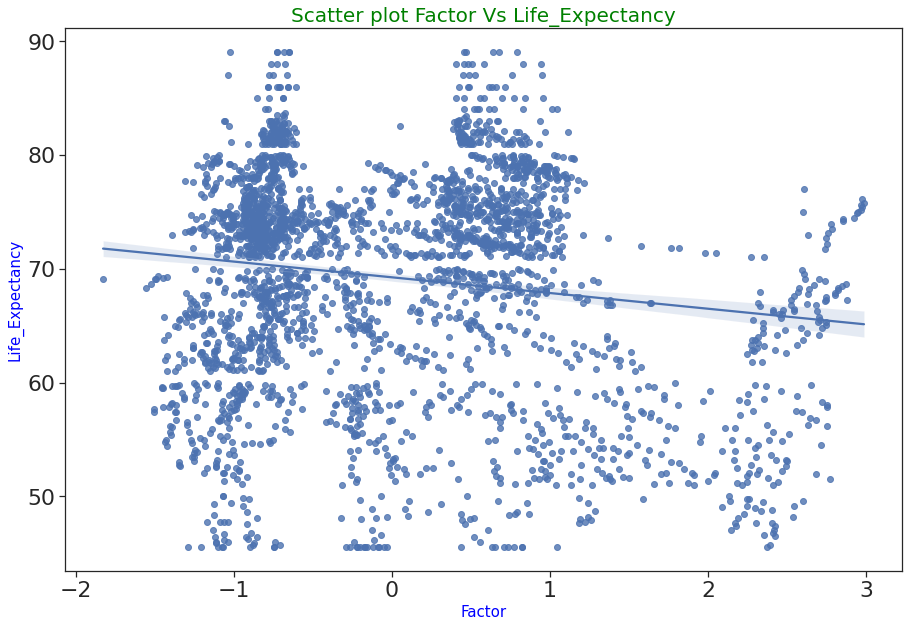

In [24]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Factor4", y = "Life_Expectancy", data= df ) 
plt.title("Scatter plot Factor Vs Life_Expectancy", size = 20, color = "Green")
plt.xlabel("Factor", size = 15, color = "Blue")
plt.ylabel("Life_Expectancy", size = 15, color = "Blue")

Text(0, 0.5, 'Life_Expectancy')

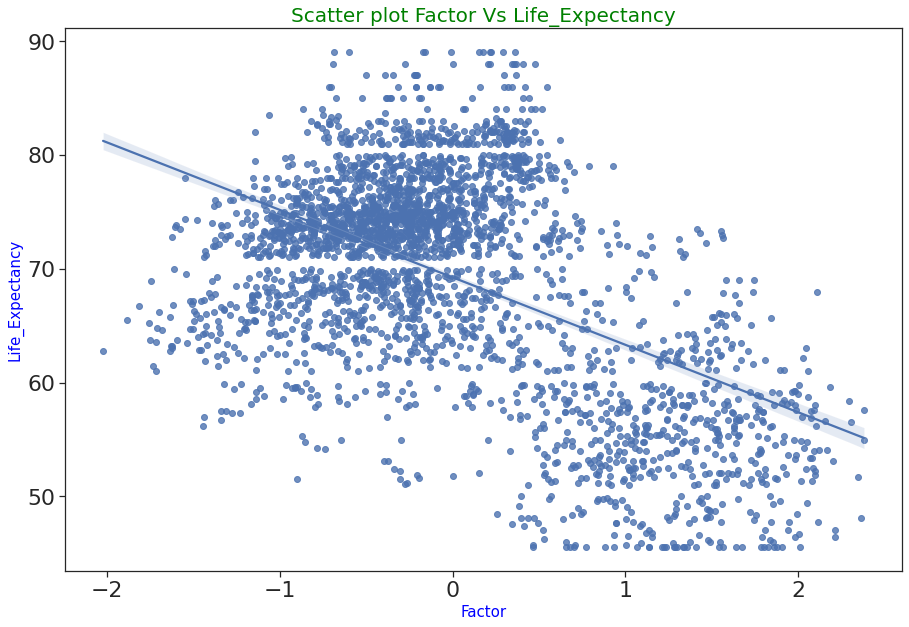

In [25]:
plt.figure(figsize=(15,10))
sns.regplot(x = "Factor5", y = "Life_Expectancy", data= df ) 
plt.title("Scatter plot Factor Vs Life_Expectancy", size = 20, color = "Green")
plt.xlabel("Factor", size = 15, color = "Blue")
plt.ylabel("Life_Expectancy", size = 15, color = "Blue")

**Data Prepration**

**Dividing the data frame to independent and dependent variable**

In [26]:
#Setting the value for X and Y
x = df[['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5']]
y = df['Life_Expectancy']

In [27]:
x

,Factor1,Factor2,Factor3,Factor4,Factor5
0,-1.321170,2.554592,0.151215,0.743292,-1.424271
1,0.913394,-0.858197,-0.089657,0.376767,-0.305957
2,0.714836,0.425719,0.023964,-0.286196,-0.868309
3,-1.385206,0.436653,0.140758,1.298880,1.185643
4,0.697782,-0.236763,0.442916,0.361209,-0.457063
...,...,...,...,...,...
2933,-0.705955,-0.783623,-0.281348,-0.650759,-0.660830
2934,0.939729,2.900209,0.029180,-0.004348,-0.945605
2935,-0.464618,2.206387,-0.299859,0.392579,-1.061399
2936,0.187417,0.497910,-0.796920,0.821276,1.798789


In [28]:
y

0       65.0
1       77.8
2       75.6
3       52.4
4       76.4
        ... 
2933    72.5
2934    73.4
2935    68.0
2936    45.6
2937    46.0
Name: Life_Expectancy, Length: 2938, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Spliting the X,Y into train and test**

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=0) 

**Training the Algorithm**

In [31]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Successfully Completed")

Training Successfully Completed


In [32]:
regressor.score(x_train,y_train)

0.8294500120296817

In [33]:
#Printing the model coefficients
print(regressor.intercept_)

69.23938362107737


In [34]:
# pair the feature names with the coefficients
list(zip(X, regressor.coef_))

[(array([-1.38491954,  2.64313248,  0.1660772 ,  0.74239688, -1.71901644]),
  3.772709682464206),
 (array([ 0.95746703, -0.88794168, -0.0984691 ,  0.37631312, -0.36927317]),
  -3.1969253044319617),
 (array([ 0.74932845,  0.44047403,  0.02631972, -0.28585094, -1.04800082]),
  4.487209091490762),
 (array([-1.4520454 ,  0.45178701,  0.15459278,  1.29731645,  1.43100577]),
  -1.3562463209259368),
 (array([ 0.73145121, -0.24496922,  0.48644982,  0.36077421, -0.55164908]),
  -4.367730352186371)]

In [35]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.8294500120296817
Test Score: 0.842545612000811


In [36]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 69.23938362107737
Coefficient is : [ 3.77270968 -3.1969253   4.48720909 -1.35624632 -4.36773035]


In [37]:
y_predic = regressor.predict(x_test)
y_predic

array([75.18089018, 58.91127338, 79.83387326, 52.43856304, 77.23666007,
       68.08747987, 80.40369285, 78.25817035, 60.62457828, 56.63201291,
       80.25239618, 75.2016287 , 64.81345652, 75.73334345, 80.08362463,
       80.89818609, 75.1985691 , 60.11908708, 73.43626053, 69.35852147,
       75.56130574, 51.65140409, 57.12615382, 75.55301811, 70.80135082,
       75.45490245, 71.94200409, 74.247775  , 73.55514741, 75.77005422,
       78.07222823, 66.47647008, 73.08283022, 59.23081543, 66.18405033,
       70.51939289, 75.75638477, 53.75034171, 72.02323342, 79.78395221,
       47.62820906, 78.1038141 , 73.14172555, 73.39756023, 51.56466229,
       63.36615311, 64.32261344, 79.71727625, 68.47894953, 66.38000756,
       79.72042757, 57.71746361, 74.86399958, 73.60945832, 71.04388866,
       74.82706186, 54.25896692, 74.08019416, 72.81225225, 62.82109481,
       70.34514138, 72.8188342 , 65.25340358, 54.45013291, 79.73113584,
       78.42675588, 71.10422035, 57.11739086, 51.70758638, 56.56

In [38]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic})    
df1

,Actual,Predicted
867,74.5,75.180890
1780,68.0,58.911273
621,86.0,79.833873
2715,45.6,52.438563
2717,73.3,77.236660
...,...,...
1290,50.0,53.780558
2724,72.7,71.698310
392,58.6,62.786344
27,53.3,60.546074


In [39]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(regressor.score(x,y)*100))

R squared value of the model: 82.21


**Mean of Residuals**


> Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.




In [40]:
y_pred_train = regressor.predict(x_train)
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

Mean of Residuals = -4.538402750535789e-15


**The mean of the residuals is so small that we can consider it zero.**

**Check for Homoscedasticity**




> Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.



**Detecting heteroscedasticity!**


> **Graphical Method:** Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.



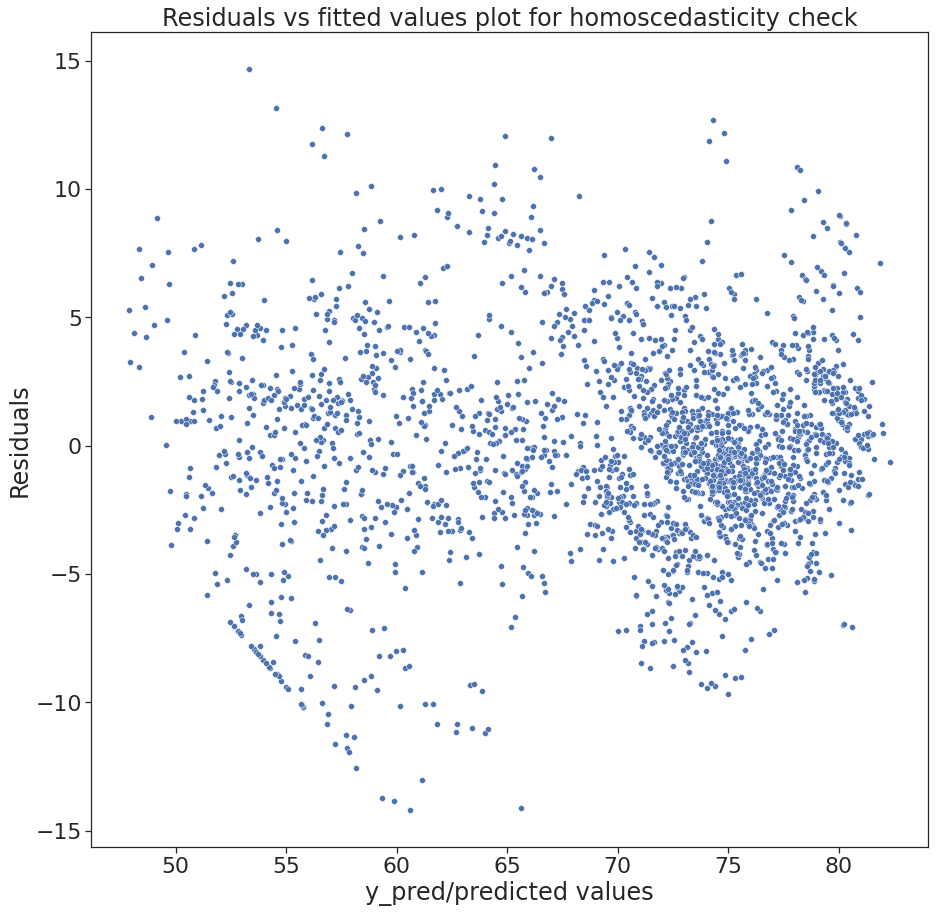

In [41]:
plt.figure(figsize=(15,15))
sns.scatterplot(y_pred_train, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


**From the scatter plot it is clear that there is no specific patters forming. So we can say homoscedasticity is present.**

In [42]:
# Homoscadasticity

from statsmodels.formula.api import ols

reg = ols("Life_Expectancy~Factor1+Factor2+Factor3+Factor4+Factor5", data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2908.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        17:16:07   Log-Likelihood:                -8148.7
No. Observations:                2938   AIC:                         1.631e+04
Df Residuals:                    2932   BIC:                         1.635e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.2488      0.072    967.594      0.0

**Goldfeld Quandt Test**

**Checking heteroscedasticity :** Using Goldfeld Quandt we test for heteroscedasticity.




> **Null Hypothesis:** Error terms are homoscedastic

> **Alternative Hypothesis:** Error terms are heteroscedastic.





In [43]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.0849104884642673), ('p-value', 0.08175987067922365)]

Since p value is greater than 0.05 in Goldfeld Quandt Test.
Therefore, we do not reject Null hypothesis.
Hnece, we Conclude that error terms are homoscedastic.





**Check for Normality of error terms/residuals**

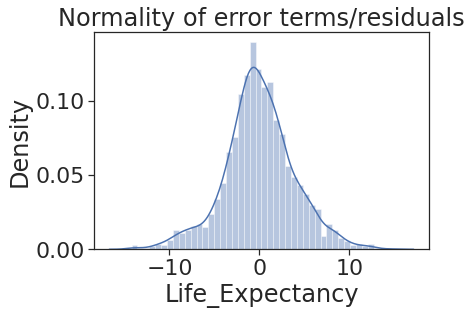

In [44]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

((array([-3.43625043, -3.1881843 , -3.0507607 , ...,  3.0507607 ,
          3.1881843 ,  3.43625043]),
  array([-14.20850098, -14.14048633, -13.86152434, ...,  12.7033241 ,
          13.17929238,  14.68579261])),
 (3.8790128594190882, -5.400707186624732e-15, 0.9946627028173367))

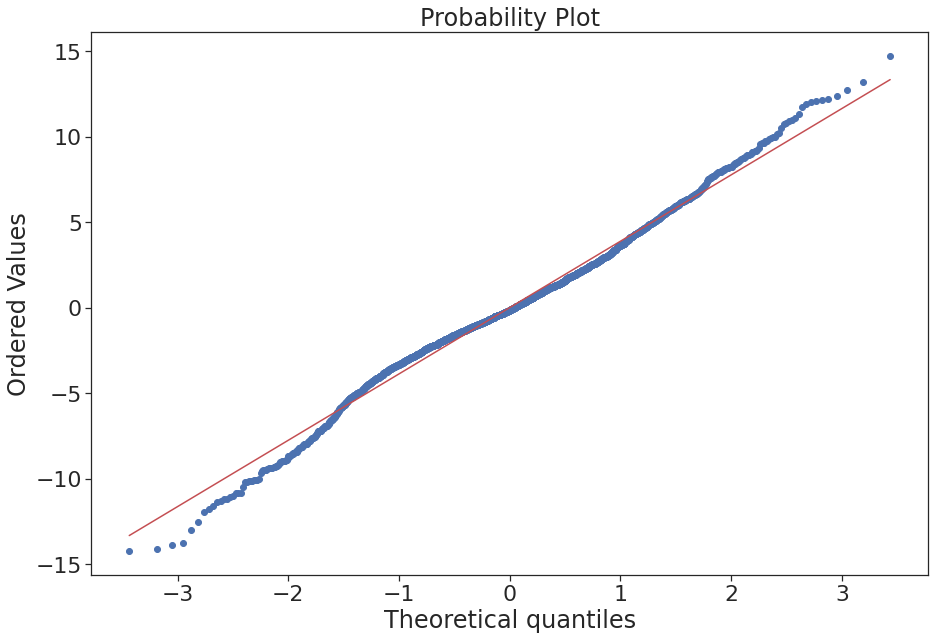

In [45]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize = (15,10))
stats.probplot(residuals, dist = "norm", plot = plt)

**No autocorrelation of residuals**

> When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

> In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

> There should not be autocorrelation in the data so the error terms should not form any pattern.

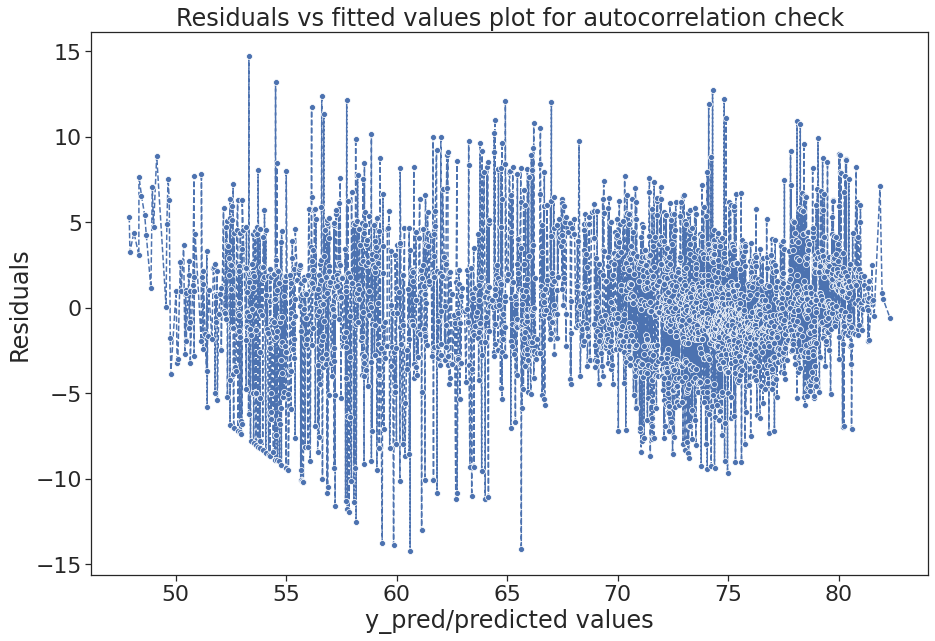

In [46]:
plt.figure(figsize=(15,10))
sns.lineplot(y_pred_train, residuals, marker = 'o', linestyle = '--')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

**Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.**

> **Null Hypothesis:** Autocorrelation is absent.

> **Alternative Hypothesis:** Autocorrelation is present.

In [47]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.31947149919915235

**Since p value is greater than 0.05 we do not reject the null hypothesis that error terms are not autocorrelated.**

**No perfect multicollinearity**

> In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

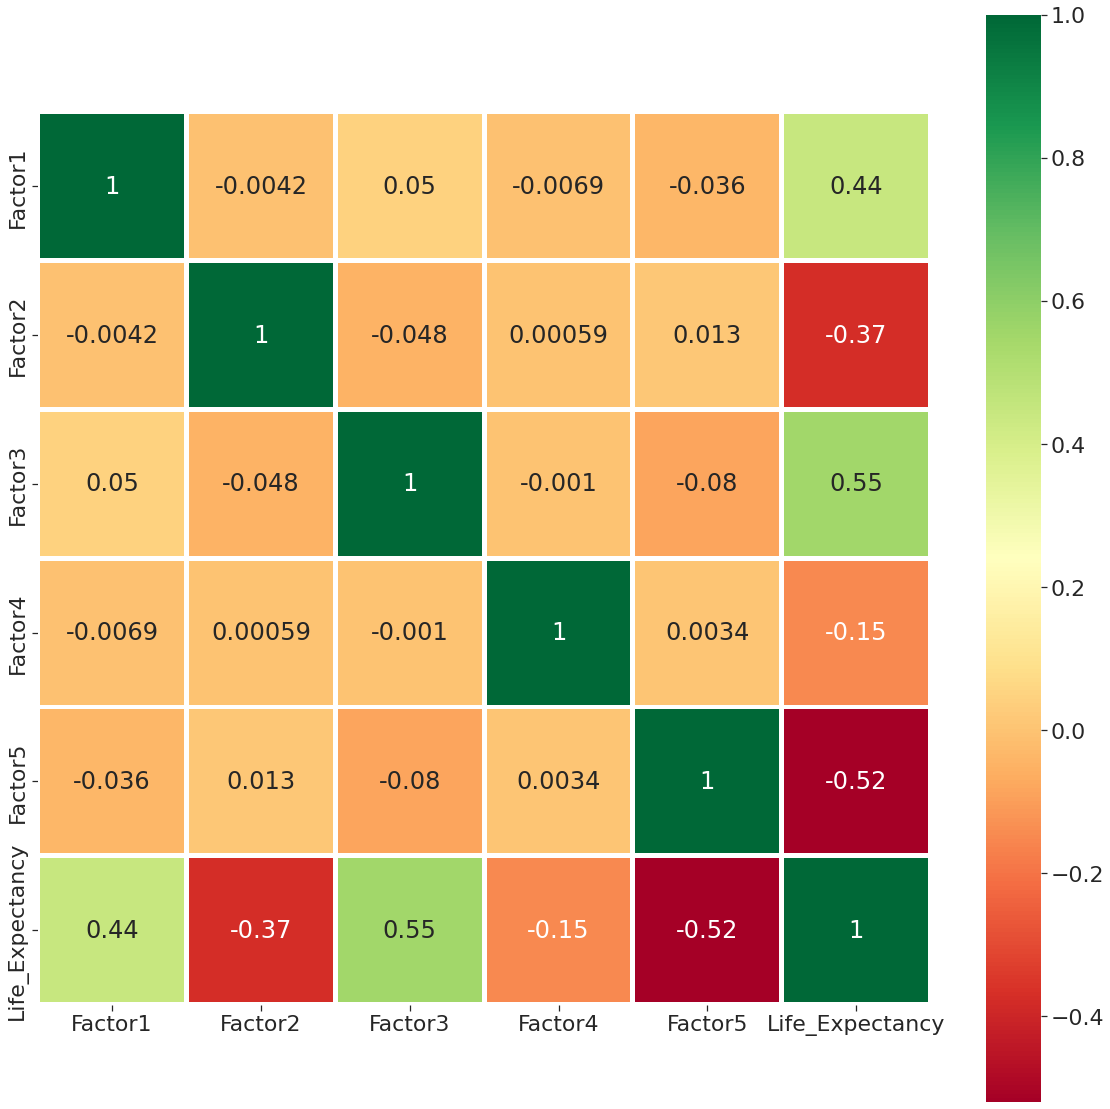

In [48]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True,linewidth= 4)  # seaborn has very simple solution for heatmap

**Model Evaluation**

In [49]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [50]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_predic))
print("MAE:",mse)

MAE: 2.858945042503749


In [51]:
# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_predic)))
print("RMSE:",rmse)

RMSE: 3.800606621431235


In [52]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_predic)
print("R-Square:",r2)

R-Square: 0.842545612000811


In [53]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_predic)
meanSqErr = metrics.mean_squared_error(y_test, y_predic)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predic))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predic)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percenatge Error:', MAPE)


Mean Absolute Error: 2.858945042503749
Mean Square Error: 14.444610690866947
Root Mean Square Error: 3.800606621431235
Mean Absolute Percenatge Error: 0.04302330442498607


**Linearity**


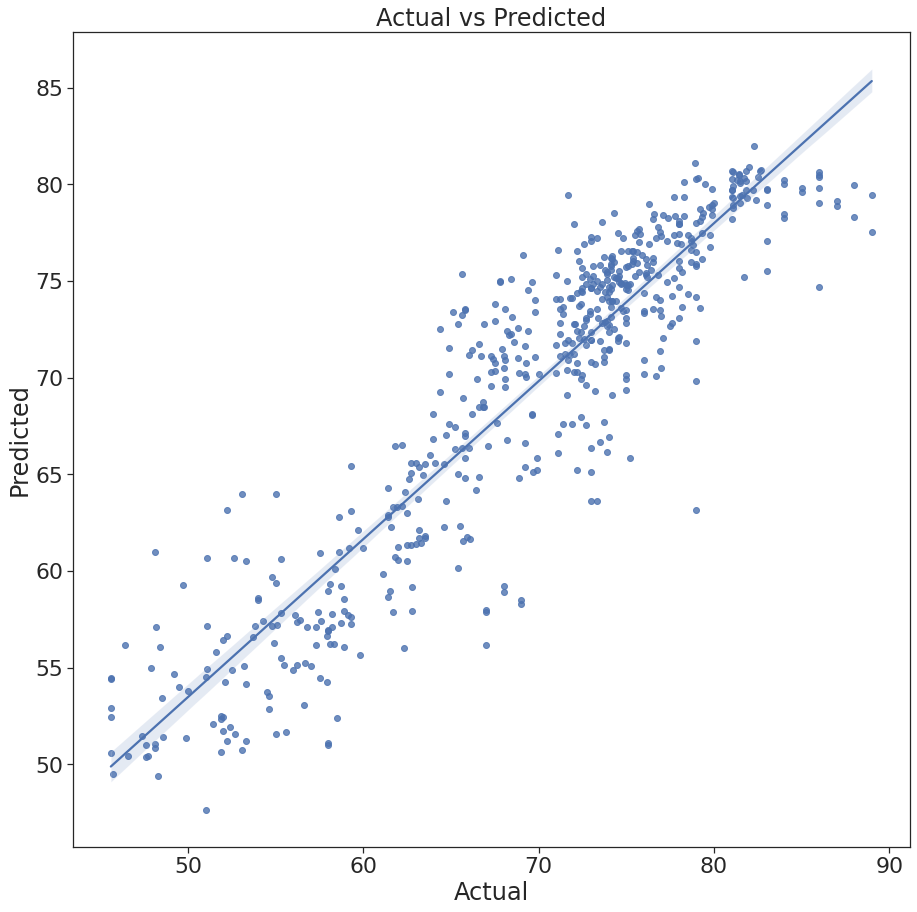

In [54]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, y_predic)
plt.xlabel('Actual')
plt.ylabel('Predicted')
p = plt.title('Actual vs Predicted')

In [55]:
## Adjusted R Square
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8318513861097969

In [57]:
## R Square Value

corr_matrix = np.corrcoef(y_test, y_predic)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.8433970489622337
